In [1]:
# %load_ext autoreload
# %autoreload 2
import os
import sys
import json
import seaborn as sns
import pandas as pd
from pathlib import Path

In [25]:
with open(os.path.join('/', os.getenv('WORKFLOW_DIR'), os.getenv('OPERATOR_IN_DIR'), 'experiment_results.json'), 'r') as f:
    experiment_results = json.load(f)
with open(os.path.join('/', os.getenv('WORKFLOW_DIR'), 'conf', 'dataset.json'), 'r') as f:
    dataset_info = json.load(f)

In [26]:
del dataset_info['test']
del dataset_info['training']
print(json.dumps(dataset_info, indent=2))

{
  "name": "Task603_RACOON_170322-1245",
  "shuffle_seed": [
    0
  ],
  "network_trainer": "nnUNetTrainerV2",
  "model": [
    "3d_lowres"
  ],
  "description": "nnUnet Segmentation",
  "reference": "nnUNet",
  "licence": "N/A",
  "release": "N/A",
  "tensorImageSize": "3D",
  "modality": {
    "0": "CT"
  },
  "labels": {
    "0": "Clear Label",
    "1": "aorta",
    "2": "esophagus",
    "3": "gallbladder",
    "4": "inferior-vena-cava",
    "5": "left@kidney",
    "6": "liver",
    "7": "pancreas",
    "8": "portal-vein",
    "9": "right@adrenal-gland",
    "10": "right@kidney",
    "11": "spleen",
    "12": "splenic-vein",
    "13": "stomach"
  },
  "numTraining": 2,
  "numTest": 0,
  "node_uid": "node_uid_173826428655931",
  "max_epochs": "2"
}


In [53]:
df_experiment_results = pd.DataFrame(experiment_results)
df_experiment_results = df_experiment_results.melt(id_vars='epoch', value_vars=df_experiment_results.columns.difference(['epoch', 'fold']))

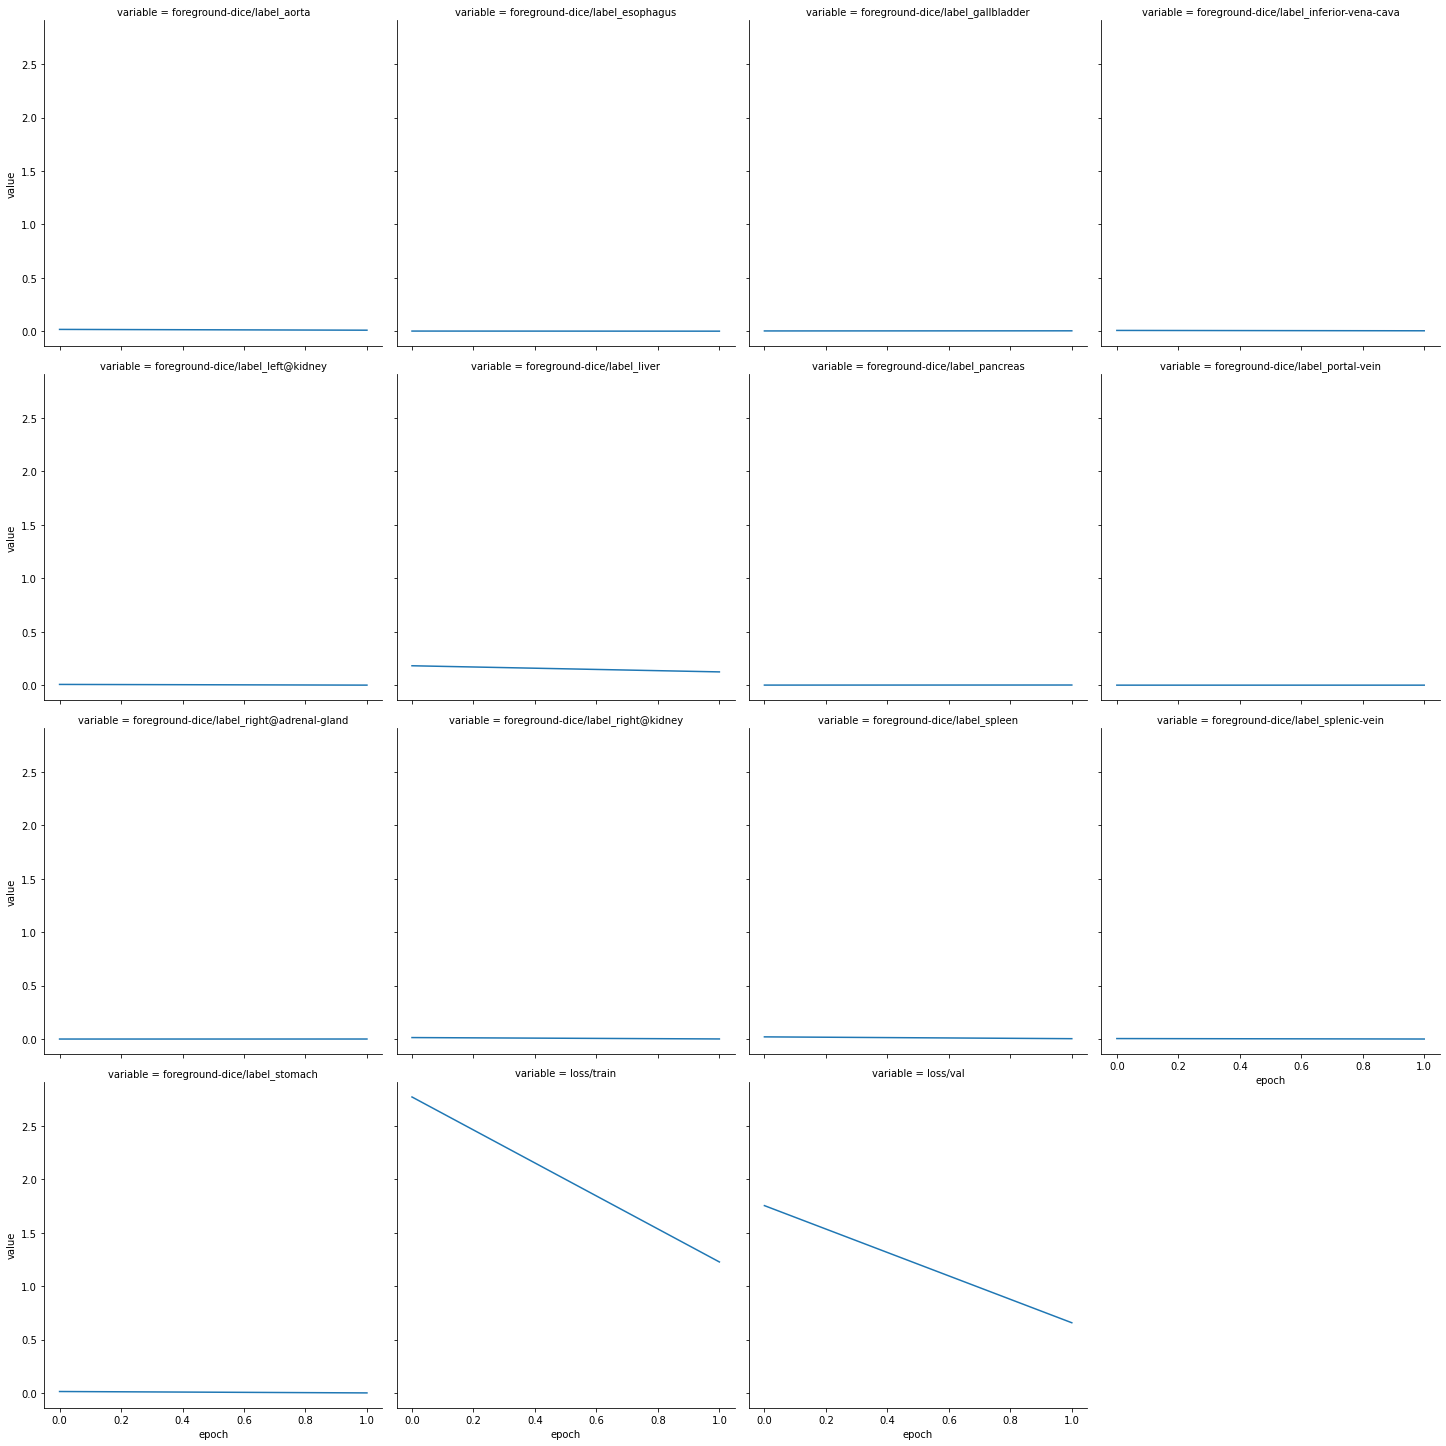

In [54]:
sns.relplot(
    data=df_experiment_results, x="epoch", y="value",
    col="variable",
    col_wrap=4,
    kind="line"
)